# ASTR19 Group Project - Tides

In [219]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, interpolate
%matplotlib inline

In [220]:
days, time, height = np.loadtxt('ASTR19_F23_group_project_data.txt', skiprows=3, unpack=True, usecols=(0, 1, 2), dtype=str)

days_hours_and_minutes = [[days[i]] + time[i].split(':') for i in range(len(time))]

print(days_hours_and_minutes)

[['1', '8', '07'], ['1', '15', '37'], ['2', '8', '55'], ['2', '16', '25'], ['3', '9', '45'], ['3', '17', '14'], ['4', '10', '35'], ['4', '18', '00'], ['5', '11', '28'], ['5', '18', '46'], ['6', '12', '22'], ['6', '19', '31'], ['7', '13', '24'], ['7', '20', '16'], ['8', '3', '22'], ['8', '21', '01'], ['9', '4', '07'], ['9', '21', '46'], ['10', '4', '50'], ['10', '11', '58'], ['11', '5', '31'], ['11', '12', '56'], ['12', '6', '08'], ['12', '13', '45'], ['13', '6', '47'], ['13', '14', '25'], ['14', '7', '22'], ['14', '15', '00'], ['15', '7', '59'], ['15', '15', '34'], ['16', '8', '34'], ['16', '16', '08'], ['17', '9', '10'], ['17', '16', '41'], ['18', '9', '45'], ['18', '17', '12'], ['19', '10', '21'], ['19', '17', '45'], ['20', '10', '57'], ['20', '18', '15'], ['21', '11', '38'], ['21', '18', '48'], ['22', '12', '25'], ['22', '19', '20'], ['23', '2', '22'], ['23', '19', '52'], ['24', '2', '58'], ['24', '20', '30'], ['25', '3', '37'], ['25', '10', '44'], ['26', '4', '23'], ['26', '11', '5

In [221]:
def convert_to_hours(days_hours_and_minutes):
    hours = []
    for day, hour, mins in days_hours_and_minutes:
        # print(day, hour, min)
        hour = int(hour) + int(mins) / 60
        hour += (int(day) - 1) * 24
        hours.append(hour)
    return hours

In [222]:
# values for our x-axis
x = convert_to_hours(days_hours_and_minutes)
print(len(x))

# convert height to float
print(type(height))
y = height.astype(np.float64)
print(y)


82
<class 'numpy.ndarray'>
[ 6.57 -0.39  5.38 -1.74  5.26 -1.36  4.13 -1.15  3.48 -1.61  2.62  0.05
  1.83  1.01  3.57  0.73  4.54  2.17  3.76  2.88  3.9   1.92  4.73  1.74
  5.66  0.79  5.33 -0.04  5.23 -1.12  6.67 -0.61  4.74 -0.93  4.69 -1.29
  4.2   0.22  3.68  0.26  2.47  0.36  2.59  0.99  4.1   1.87  3.17  1.6
  3.71  3.1   4.04  2.49  4.07  2.18  5.93  0.7   6.89  0.21  6.72  0.22
  6.77 -1.68  5.77 -1.32  4.35 -0.73  4.23 -0.38  2.24 -0.61  3.45 -0.46
  4.13  1.21  3.34  2.58  3.32  3.26  5.21  2.39  4.83  2.41]


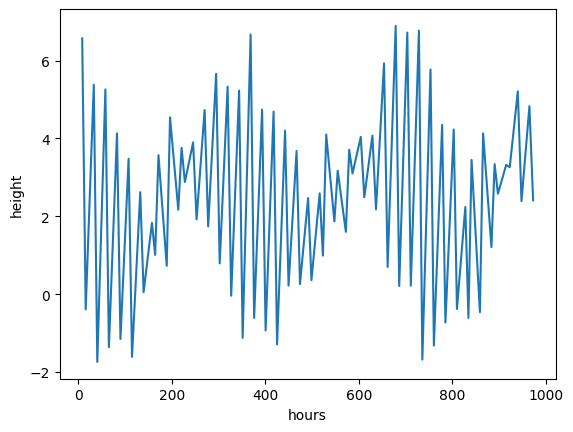

In [223]:
# plot x vs. y
plt.plot(x, y)
plt.xlabel('hours')
plt.ylabel('height')
plt.show()

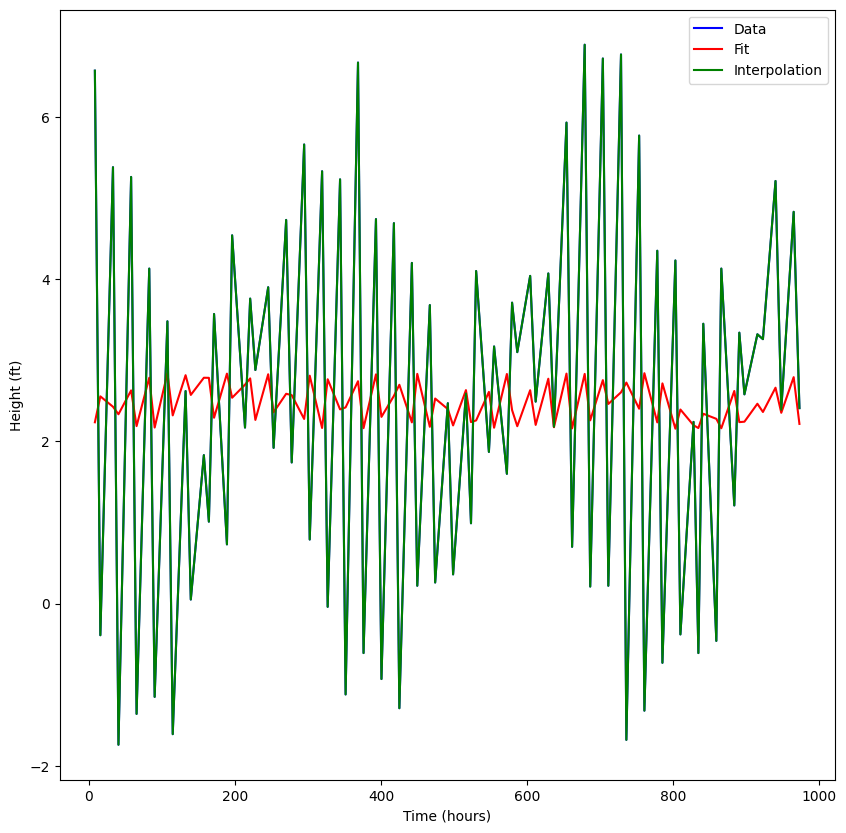

In [224]:
def cos(x, a, b, c):
    return a * (np.cos(b + x)**2) + c

# get the fit
params, params_cov = optimize.curve_fit(cos, x, y, sigma=0.25)
a_fit, b_fit, c_fit = params
y_fit = cos(x, a_fit, b_fit, c_fit)

# make a guess using interpolator
rad_interpol = interpolate.interp1d(x, y, kind='linear', fill_value='extrapolate')
radii_int = rad_interpol(x)

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(x, y, 'b-', label='Data')
ax.plot(x, y_fit, 'r-', label='Fit')
ax.plot(x, radii_int, 'g-', label='Interpolation')

ax.set_xlabel('Time (hours)')
ax.set_ylabel('Height (ft)')
ax.legend()

plt.show()

In [225]:
new_x = []
for i in range(0, len(x) - 1, 2):
    x[i] = (x[i] + x[i + 1]) / 2
    new_x.append(x[i])

avg_height = []
for i in range(0, len(y) - 1, 2):
    y[i] = (y[i] + y[i + 1]) / 2
    avg_height.append(y[i])

print(len(x))
print(len(new_x))
print(new_x)

print(len(y))
print(len(avg_height))
print(avg_height)


82
41
[11.866666666666667, 36.66666666666667, 61.49166666666667, 86.29166666666666, 111.11666666666667, 135.94166666666666, 160.83333333333331, 180.19166666666666, 204.94166666666666, 224.4, 249.22500000000002, 273.94166666666666, 298.6, 323.18333333333334, 347.775, 372.35, 396.925, 421.475, 446.05, 470.6, 495.2166666666667, 519.875, 539.1166666666667, 563.7333333333333, 583.175, 608.15, 633.1, 657.9916666666667, 682.8666666666667, 707.7083333333334, 732.5, 757.2666666666667, 782.0333333333333, 806.7583333333334, 831.4916666666667, 850.4666666666667, 875.1083333333333, 894.4, 919.45, 944.425, 969.2916666666667]
82
41
[3.0900000000000003, 1.8199999999999998, 1.9499999999999997, 1.49, 0.9349999999999999, 1.335, 1.42, 2.15, 3.355, 3.32, 2.91, 3.2350000000000003, 3.225, 2.645, 2.055, 3.03, 1.905, 1.7000000000000002, 2.21, 1.9700000000000002, 1.415, 1.79, 2.985, 2.385, 3.4050000000000002, 3.265, 3.125, 3.315, 3.55, 3.4699999999999998, 2.545, 2.2249999999999996, 1.8099999999999998, 1.9250000

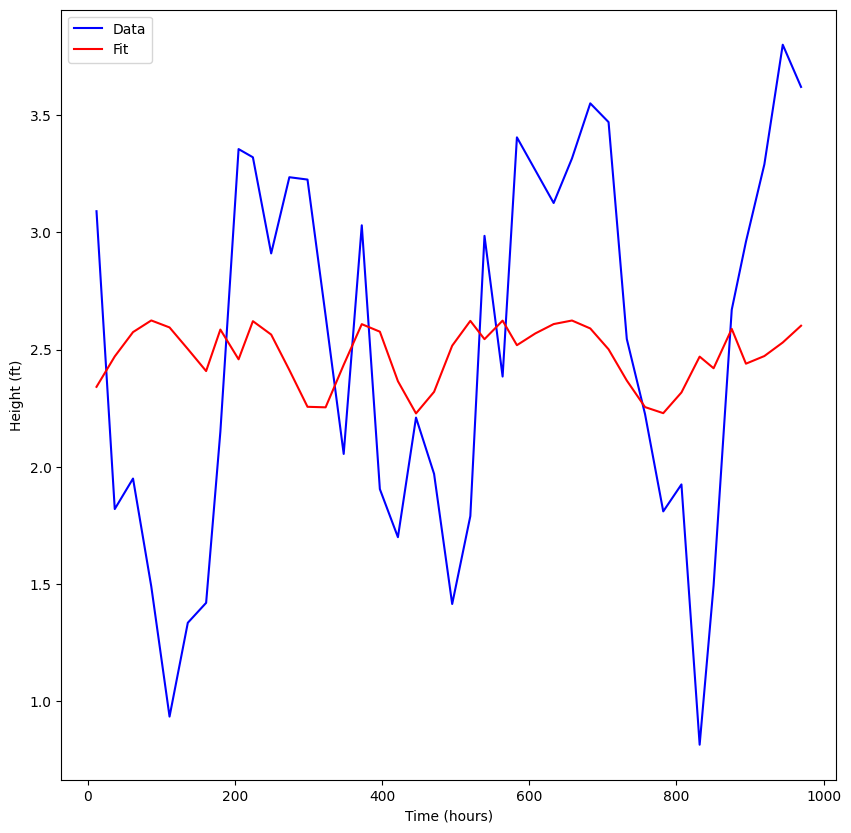

In [226]:
# get the fit
params, params_cov = optimize.curve_fit(cos, new_x, avg_height, sigma=0.25)
a_fit, b_fit, c_fit = params
y_fit = cos(new_x, a_fit, b_fit, c_fit)

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(new_x, avg_height, 'b-', label='Data')
ax.plot(new_x, y_fit, 'r-', label='Fit')

ax.set_xlabel('Time (hours)')
ax.set_ylabel('Height (ft)')
ax.legend()

plt.show()